# Preparar los Datos
Importar las bibliotecas necesarias (pandas, matplotlib, seaborn) y cargar los archivos CSV de SPIMI y PostgreSQL

In [6]:
# %pip install seaborn

In [7]:
# Importar las bibliotecas necesarias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar los archivos CSV de SPIMI y PostgreSQL
postgres = pd.read_csv('search_results_postgres.csv')
spimi = pd.read_csv('search_results_spimi.csv')

# Calcular Promedios por Query
Agrupar los datos por query y table_size, calculando el promedio de execution_time_ms para cada caso

In [8]:
# Calcular Promedios por Query
import matplotlib.pyplot as plt
import seaborn as sns

# Agrupar los datos por query y table_size, calculando el promedio de execution_time_ms para cada caso
promedios_postgres = postgres.groupby(['query', 'table_size'])['execution_time_ms'].mean().reset_index()
promedios_spimi = spimi.groupby(['query', 'table_size'])['execution_time_ms'].mean().reset_index()

# Filtrar los datos para la primera query "love"
promedios_postgres_love = promedios_postgres[promedios_postgres['query'] == 'love']
promedios_spimi_love = promedios_spimi[promedios_spimi['query'] == 'love']

# Filtrar los datos para la segunda query "in the house tonight"
promedios_postgres_house = promedios_postgres[promedios_postgres['query'] == 'in the house tonight']
promedios_spimi_house = promedios_spimi[promedios_spimi['query'] == 'in the house tonight']

# Crear un dataframe con los promedios de las consultas
promedios_df = pd.concat([promedios_postgres, promedios_spimi], keys=['PostgreSQL', 'SPIMI']).reset_index(level=0).rename(columns={'level_0': 'database'})
promedios_df


,database,query,table_size,execution_time_ms
0,PostgreSQL,in the house tonight,1000,10.655403
1,PostgreSQL,in the house tonight,2000,20.663579
2,PostgreSQL,in the house tonight,4000,28.504054
3,PostgreSQL,in the house tonight,8000,60.639143
4,PostgreSQL,in the house tonight,16000,111.058950
5,PostgreSQL,in the house tonight,32000,218.100468
6,PostgreSQL,in the house tonight,64000,226.464669
7,PostgreSQL,love,1000,19.384225
8,PostgreSQL,love,2000,35.336892
9,PostgreSQL,love,4000,73.180119


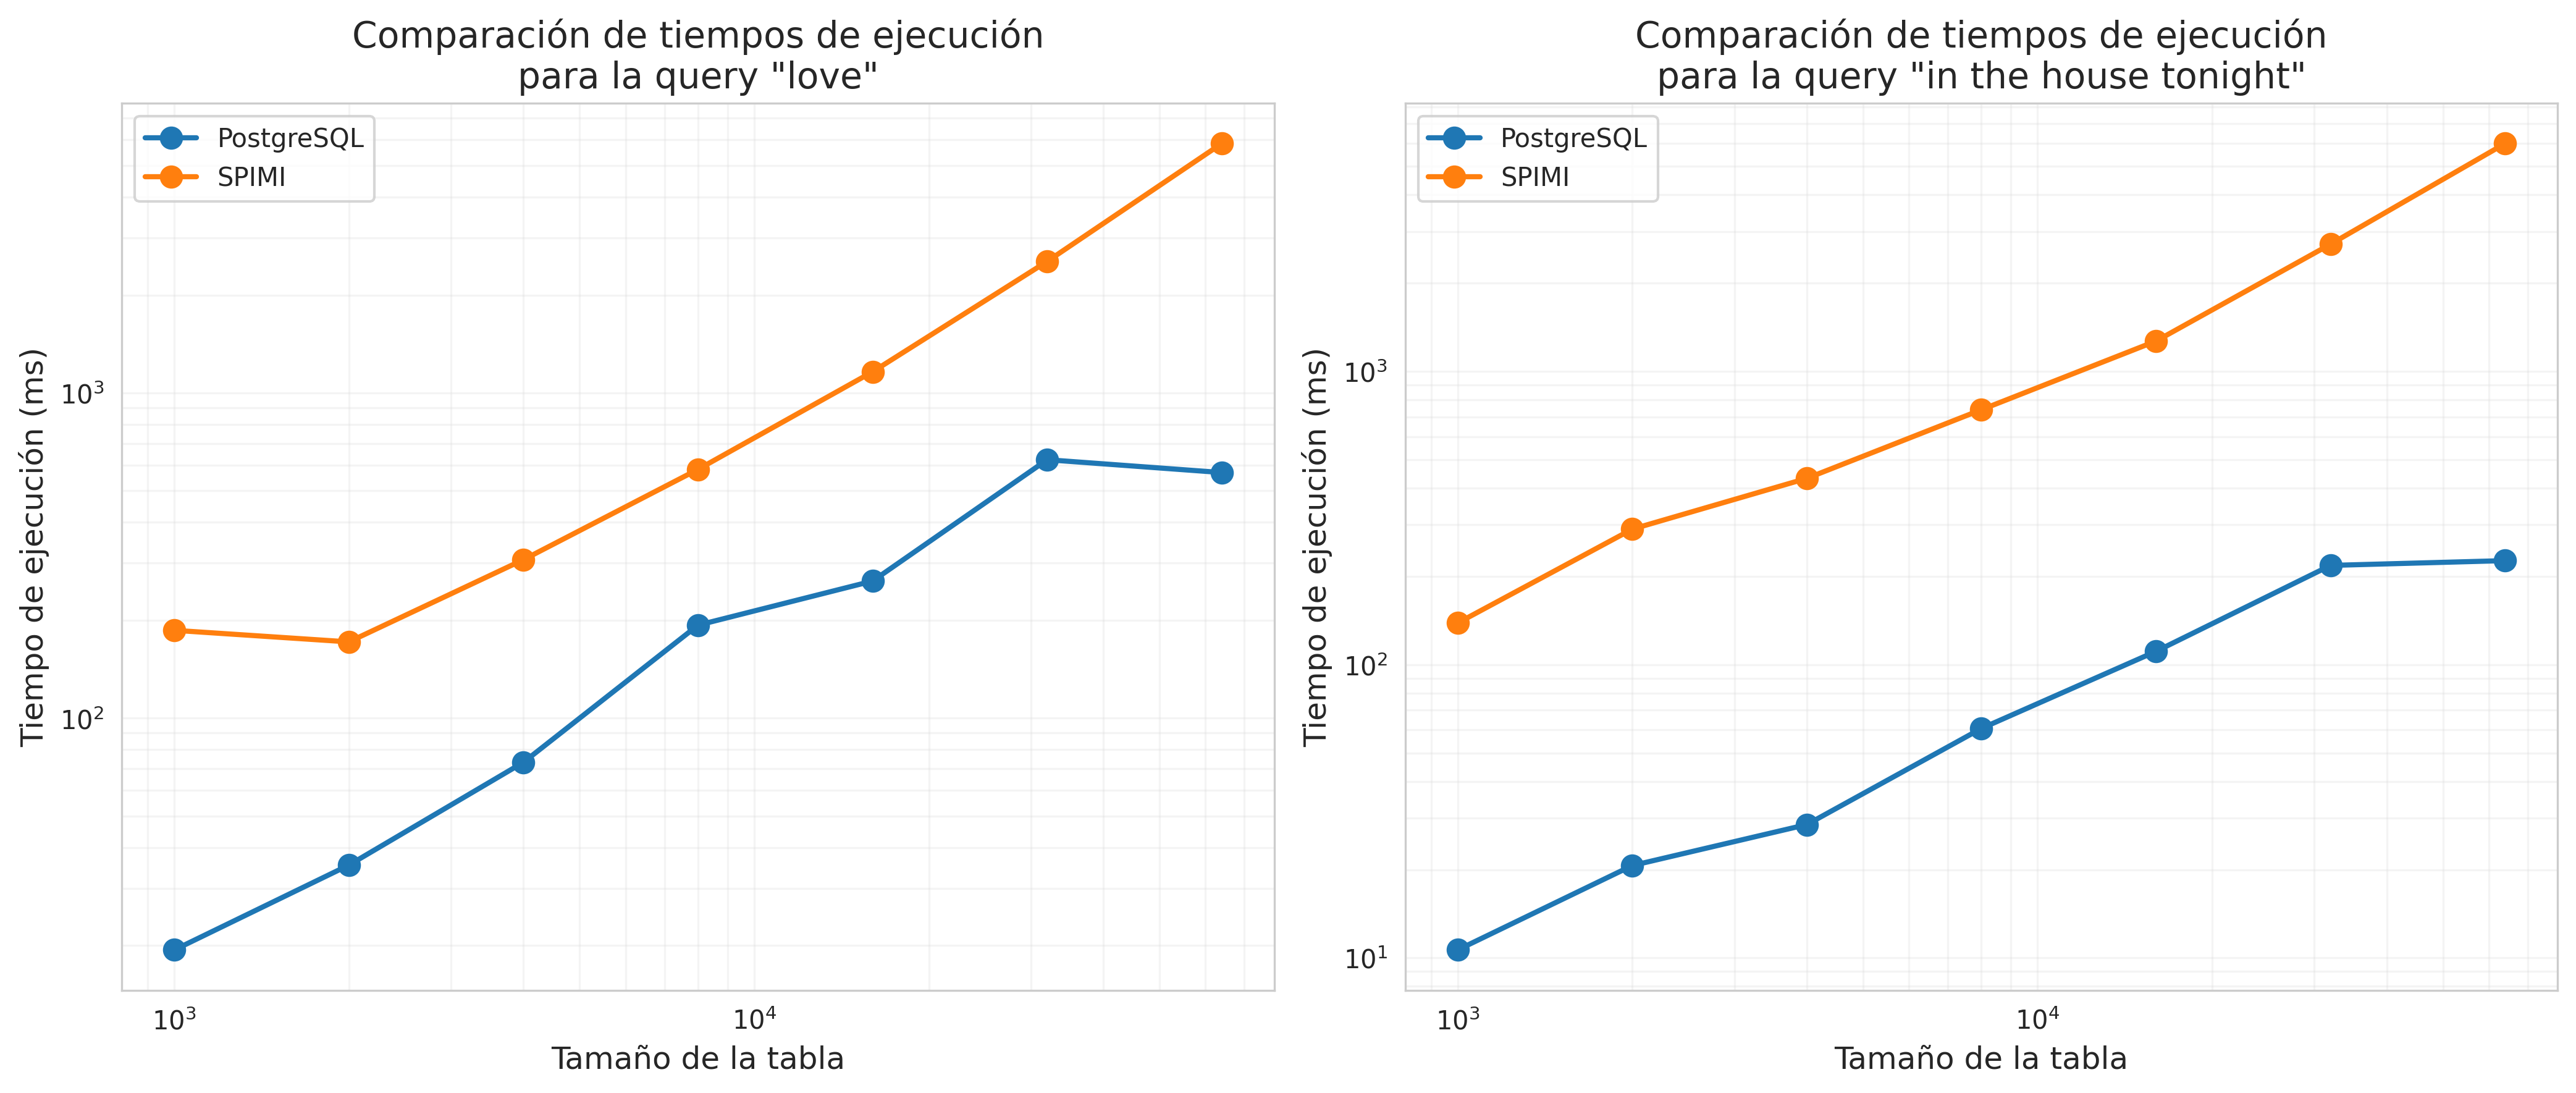

In [9]:
# Configurar el estilo y la resolución
sns.set_style("whitegrid")  # Usamos el estilo de seaborn directamente
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300

# Crear figura con mayor tamaño
fig = plt.figure(figsize=(14, 6))

# Gráfica para la query "love"
plt.subplot(1, 2, 1)
plt.plot(promedios_postgres_love['table_size'], promedios_postgres_love['execution_time_ms'], 
         label='PostgreSQL', marker='o', linewidth=2, markersize=8)
plt.plot(promedios_spimi_love['table_size'], promedios_spimi_love['execution_time_ms'], 
         label='SPIMI', marker='o', linewidth=2, markersize=8)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Tamaño de la tabla', fontsize=12)
plt.ylabel('Tiempo de ejecución (ms)', fontsize=12)
plt.title('Comparación de tiempos de ejecución\npara la query "love"', fontsize=14)
plt.grid(True, which="both", ls="-", alpha=0.2)
plt.legend(fontsize=10)

# Gráfica para la query "in the house tonight"
plt.subplot(1, 2, 2)
plt.plot(promedios_postgres_house['table_size'], promedios_postgres_house['execution_time_ms'], 
         label='PostgreSQL', marker='o', linewidth=2, markersize=8)
plt.plot(promedios_spimi_house['table_size'], promedios_spimi_house['execution_time_ms'], 
         label='SPIMI', marker='o', linewidth=2, markersize=8)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Tamaño de la tabla', fontsize=12)
plt.ylabel('Tiempo de ejecución (ms)', fontsize=12)
plt.title('Comparación de tiempos de ejecución\npara la query "in the house tonight"', fontsize=14)
plt.grid(True, which="both", ls="-", alpha=0.2)
plt.legend(fontsize=10)

plt.tight_layout()

# Guardar las gráficas en alta calidad
plt.savefig('comparison_queries.png', 
            dpi=300, 
            bbox_inches='tight',
            facecolor='white',
            edgecolor='none')

# Mostrar las gráficas
plt.show()

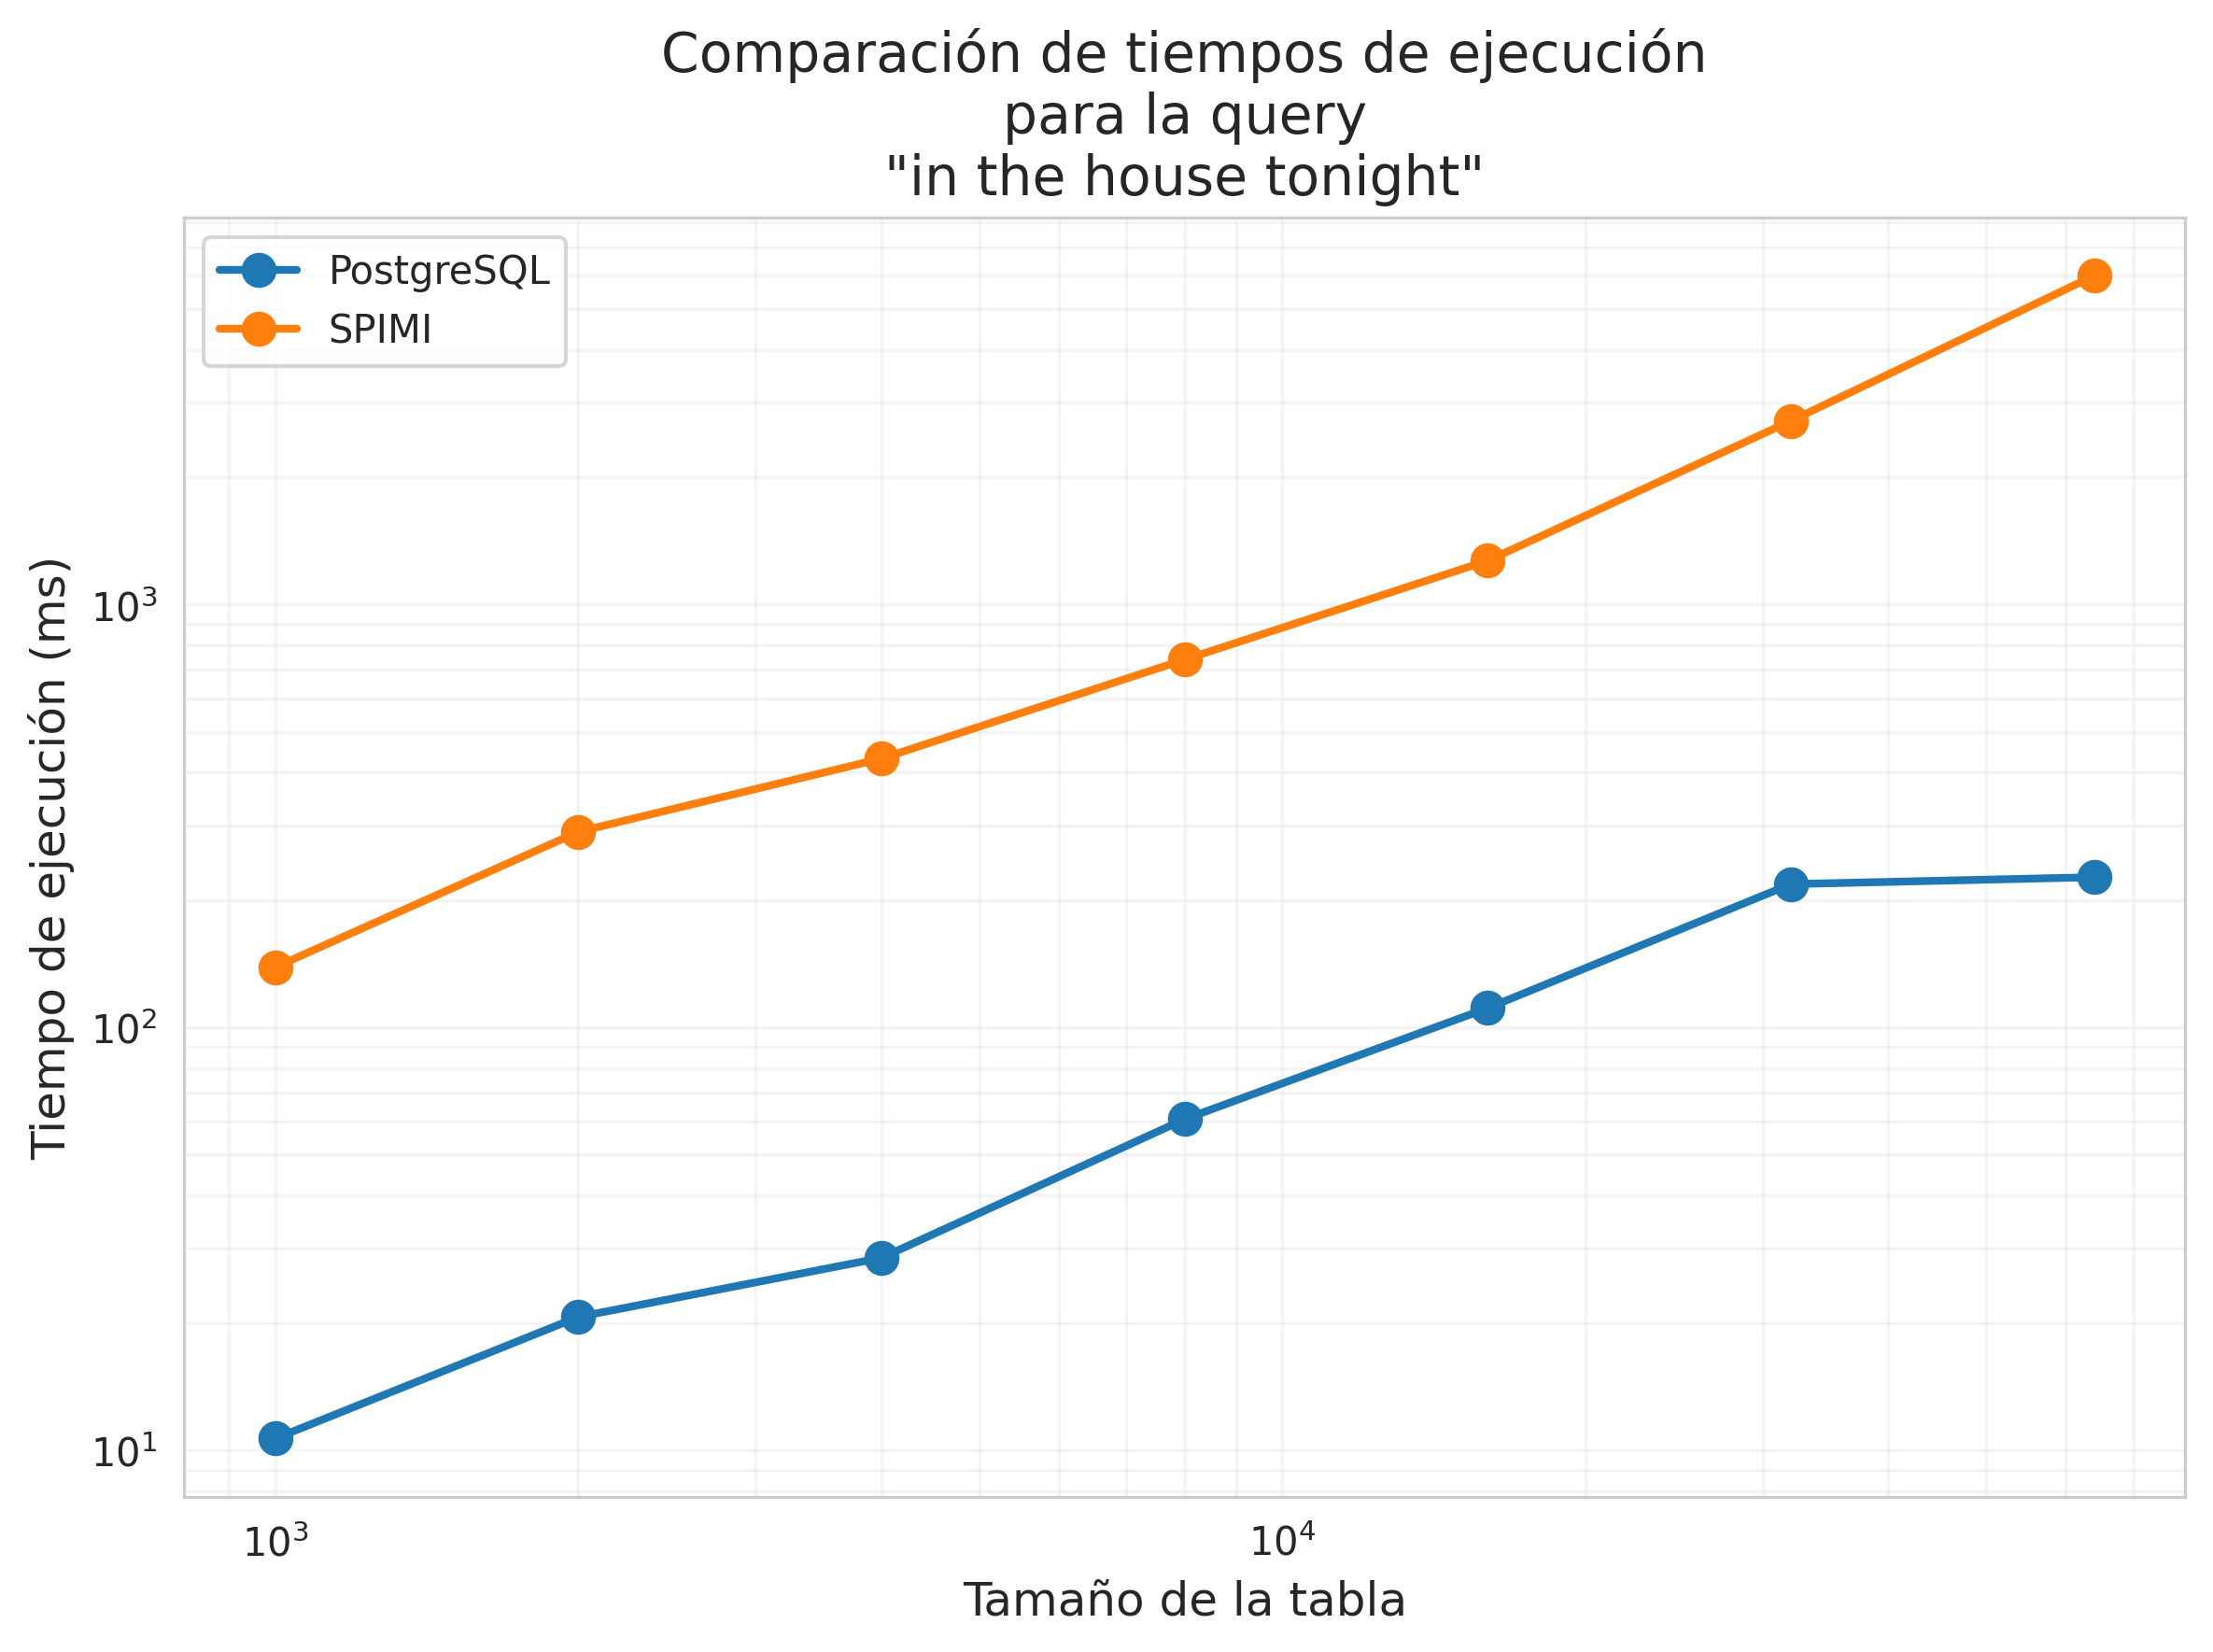

In [10]:

# Calcular Promedios por Query
import matplotlib.pyplot as plt
import seaborn as sns

# Agrupar los datos por query y table_size, calculando el promedio de execution_time_ms para cada caso
promedios_postgres = postgres.groupby(['query', 'table_size'])['execution_time_ms'].mean().reset_index()
promedios_spimi = spimi.groupby(['query', 'table_size'])['execution_time_ms'].mean().reset_index()

# Filtrar los datos para la primera query "love"
promedios_postgres_love = promedios_postgres[promedios_postgres['query'] == 'love']
promedios_spimi_love = promedios_spimi[promedios_spimi['query'] == 'love']

# Filtrar los datos para la segunda query "in the house tonight"
promedios_postgres_house = promedios_postgres[promedios_postgres['query'] == 'in the house tonight']
promedios_spimi_house = promedios_spimi[promedios_spimi['query'] == 'in the house tonight']

# Configurar el estilo y la resolución
sns.set_style("whitegrid")
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300

# Gráfica para "love"
plt.figure(figsize=(8, 6))
plt.plot(promedios_postgres_love['table_size'], promedios_postgres_love['execution_time_ms'], 
         label='PostgreSQL', marker='o', linewidth=2, markersize=8)
plt.plot(promedios_spimi_love['table_size'], promedios_spimi_love['execution_time_ms'], 
         label='SPIMI', marker='o', linewidth=2, markersize=8)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Tamaño de la tabla', fontsize=12)
plt.ylabel('Tiempo de ejecución (ms)', fontsize=12)
plt.title('Comparación de tiempos de ejecución\npara la query "love"', fontsize=14)
plt.grid(True, which="both", ls="-", alpha=0.2)
plt.legend(fontsize=10)
plt.tight_layout()
# Guardar gráfica "love"
plt.savefig('comparison_love.png', 
            dpi=300, 
            bbox_inches='tight',
            facecolor='white',
            edgecolor='none')
plt.close()

# Gráfica para "in the house tonight"
plt.figure(figsize=(8, 6))
plt.plot(promedios_postgres_house['table_size'], promedios_postgres_house['execution_time_ms'], 
         label='PostgreSQL', marker='o', linewidth=2, markersize=8)
plt.plot(promedios_spimi_house['table_size'], promedios_spimi_house['execution_time_ms'], 
         label='SPIMI', marker='o', linewidth=2, markersize=8)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Tamaño de la tabla', fontsize=12)
plt.ylabel('Tiempo de ejecución (ms)', fontsize=12)
plt.title('Comparación de tiempos de ejecución\npara la query\n"in the house tonight"', fontsize=14)
plt.grid(True, which="both", ls="-", alpha=0.2)
plt.legend(fontsize=10)
plt.tight_layout()
# Guardar gráfica "house"
plt.savefig('comparison_house.png', 
            dpi=300, 
            bbox_inches='tight',
            facecolor='white',
            edgecolor='none')
plt.show()

